In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
from config import api_key
import openweathermapy as ow




In [2]:
city = citipy.nearest_city(23.5,56).city_name
print(city)

nizwa


In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)


cities = []
for lat, lng in zip(lats, lngs):
    city = citipy.nearest_city(lat,lng).city_name
    if city not in cities:
        cities.append(city)

print(len(cities))

600


In [4]:
sum_df = pd.DataFrame({
    'City':cities
})

sum_df.head()

,City
0,punta arenas
1,bluff
2,butaritari
3,grand river south east
4,muleba


In [5]:
settings = {
    'units':'imperial',
    'appid':api_key
}

print("Beginning Data Retrieval\n")
print("------------------------\n")

for i in range(len(cities)):
    print('Processing Record {}  |  {}'.format(i+1,cities[i]))
    try:
        responce = ow.get_current(cities[i],**settings)
        sum_df.loc[sum_df['City']==cities[i],'Country'] = responce('sys.country')
        sum_df.loc[sum_df['City']==cities[i],'Date'] = responce('dt')
        sum_df.loc[sum_df['City']==cities[i],'Lat'] = responce('coord.lat')
        sum_df.loc[sum_df['City']==cities[i],'Lng'] = responce('coord.lon')
        sum_df.loc[sum_df['City']==cities[i],'Max Temp'] = responce('main.temp_max')
        sum_df.loc[sum_df['City']==cities[i],'Wind Speed'] = responce('wind.speed')
        sum_df.loc[sum_df['City']==cities[i],'Humidity'] = responce('main.humidity')
        sum_df.loc[sum_df['City']==cities[i],'Cloudiness'] = responce('clouds.all')
        #sum_df.loc[sum_df['City']==cities[i],'Timezone'] = responce('timezone')
    except:
        print("City not Found. Skipping..")

    

sum_df.head()

Beginning Data Retrieval
Processing Record 1  |  punta arenas
Processing Record 2  |  bluff
Processing Record 3  |  butaritari
Processing Record 4  |  grand river south east
City not Found. Skipping..
Processing Record 5  |  muleba
Processing Record 6  |  tuktoyaktuk
Processing Record 7  |  rikitea
Processing Record 8  |  airai
Processing Record 9  |  maniitsoq
Processing Record 10  |  vaini
Processing Record 11  |  amalapuram
Processing Record 12  |  port lincoln
Processing Record 13  |  mount isa
Processing Record 14  |  severo-kurilsk
Processing Record 15  |  komsomolskiy
Processing Record 16  |  castro
Processing Record 17  |  bredasdorp
Processing Record 18  |  alta floresta
Processing Record 19  |  margate
Processing Record 20  |  san patricio
Processing Record 21  |  albany
Processing Record 22  |  ushuaia
Processing Record 23  |  noyabrsk
Processing Record 24  |  san andres
Processing Record 25  |  salalah
Processing Record 26  |  pizarro
Processing Record 27  |  west helena
Pr

Processing Record 219  |  caucasia
Processing Record 220  |  gorontalo
Processing Record 221  |  satitoa
City not Found. Skipping..
Processing Record 222  |  novyy urgal
Processing Record 223  |  belturbet
Processing Record 224  |  codajas
Processing Record 225  |  buritizeiro
Processing Record 226  |  labuhan
Processing Record 227  |  karratha
Processing Record 228  |  cherskiy
Processing Record 229  |  port-gentil
Processing Record 230  |  tiznit
Processing Record 231  |  warrnambool
Processing Record 232  |  sistranda
Processing Record 233  |  lima
Processing Record 234  |  bubaque
Processing Record 235  |  laguna
Processing Record 236  |  wolmaranstad
City not Found. Skipping..
Processing Record 237  |  tuatapere
Processing Record 238  |  dzhusaly
City not Found. Skipping..
Processing Record 239  |  taltal
Processing Record 240  |  sambava
Processing Record 241  |  hualmay
Processing Record 242  |  aksu
Processing Record 243  |  longyearbyen
Processing Record 244  |  rosetta
Proces

Processing Record 437  |  atambua
Processing Record 438  |  pasighat
Processing Record 439  |  contamana
Processing Record 440  |  venice
Processing Record 441  |  puerto rico
Processing Record 442  |  jaisalmer
Processing Record 443  |  salinopolis
Processing Record 444  |  fougamou
Processing Record 445  |  sergeyevka
Processing Record 446  |  huilong
Processing Record 447  |  homer
Processing Record 448  |  kungurtug
Processing Record 449  |  kedrovoye
Processing Record 450  |  meulaboh
Processing Record 451  |  beliator
Processing Record 452  |  kununurra
Processing Record 453  |  yumen
Processing Record 454  |  semporna
Processing Record 455  |  noumea
Processing Record 456  |  koping
Processing Record 457  |  bocanda
Processing Record 458  |  lucea
Processing Record 459  |  camacha
Processing Record 460  |  tura
Processing Record 461  |  union
Processing Record 462  |  khanpur
Processing Record 463  |  hede
Processing Record 464  |  svetlaya
Processing Record 465  |  gangotri
Cit

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Humidity,Cloudiness
0,punta arenas,CL,1.572204e+09,-53.16,-70.91,44.60,31.09,48.0,75.0
1,bluff,AU,1.572204e+09,-23.58,149.07,69.35,13.22,68.0,46.0
2,butaritari,KI,1.572204e+09,3.07,172.79,84.51,8.14,65.0,84.0
3,grand river south east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,muleba,TZ,1.572204e+09,-1.84,31.66,71.60,3.74,83.0,5.0


In [42]:
sum_df = sum_df.dropna()
#sum_df['Date'] = pd.to_datetime(sum_df['Date'], utc=True)
sum_df.info()
sum_df.to_csv('WeatherCSV.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 599
Data columns (total 9 columns):
City          545 non-null object
Country       545 non-null object
Date          545 non-null float64
Lat           545 non-null float64
Lng           545 non-null float64
Max Temp      545 non-null float64
Wind Speed    545 non-null float64
Humidity      545 non-null float64
Cloudiness    545 non-null float64
dtypes: float64(7), object(2)
memory usage: 42.6+ KB


# Temperature Across Latitudes

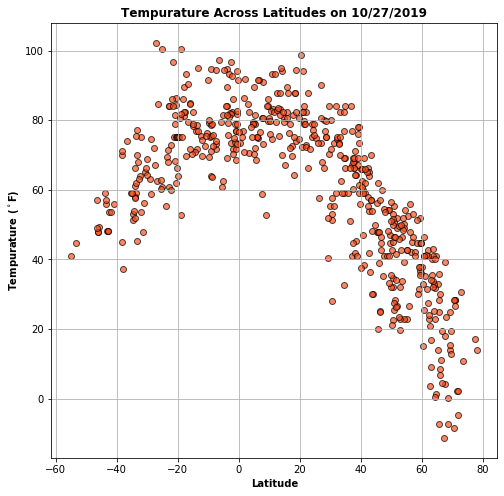

In [7]:
from datetime import datetime

now = datetime.now().strftime('%m/%d/%Y')

y = sum_df.loc[:,'Max Temp'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#fb4c19')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Tempurature ($^\circ$F)', fontweight='bold')
plt.title('Tempurature Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.show()

# Humidity Across Latitudes

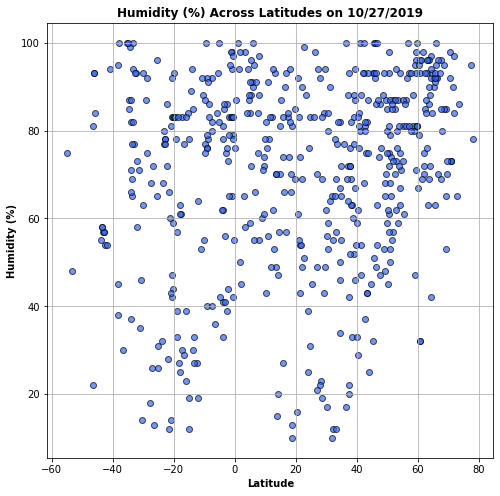

In [10]:
y = sum_df.loc[:,'Humidity'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#3366ff')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.title('Humidity (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.show()

# Cloud Cover Across Latitudes

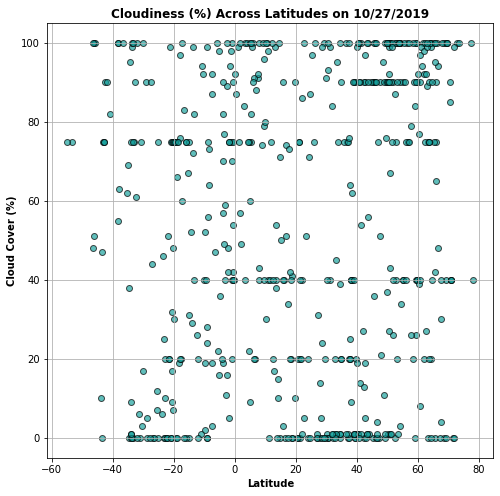

In [29]:
y = sum_df.loc[:,'Cloudiness'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#159f9b')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloud Cover (%)', fontweight='bold')
plt.title('Cloudiness (%) Across Latitudes on {}'.format(now),fontweight='bold')
plt.grid(True)
plt.show()

# Wind Speed Across Latitudes

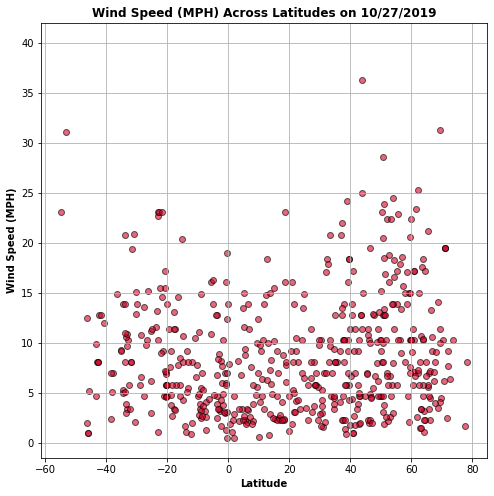

In [33]:
y = sum_df.loc[:,'Wind Speed'].values
x = sum_df.loc[:,'Lat'].values

plt.figure(figsize=(8,8))
plt.scatter(x,y,edgecolor='k',alpha=.6,color='#d40225')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed (MPH)', fontweight='bold')
plt.title('Wind Speed (MPH) Across Latitudes on {}'.format(now),fontweight='bold')
plt.ylim(y.min()-2,42)

plt.grid(True)
plt.show()

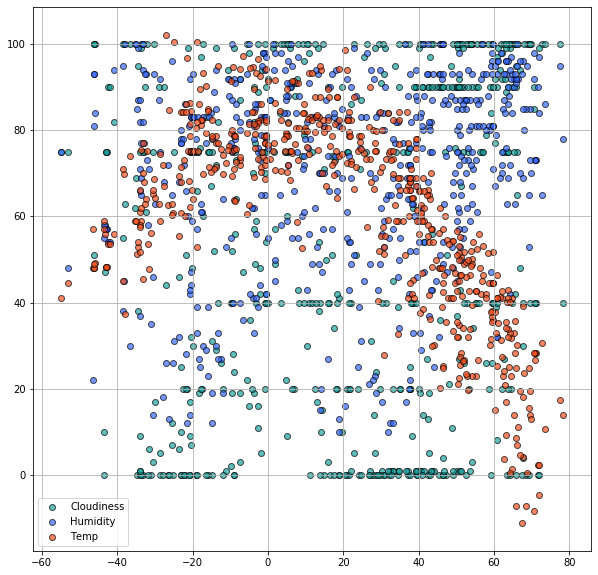

In [40]:

x = sum_df.loc[:,'Lat'].values


plt.figure(figsize=(10,10))
y_clouds = sum_df.loc[:,'Cloudiness'].values
plt.scatter(x,y_clouds,edgecolor='k',alpha=.68,color='#159f9b', label='Cloudiness')

y_hum = sum_df.loc[:,'Humidity'].values
plt.scatter(x,y_hum,edgecolor='k',alpha=.68,color='#3366ff',label='Humidity')

y = sum_df.loc[:,'Max Temp'].values
plt.scatter(x,y,edgecolor='k',alpha=.68,color='#fb4c19', label='Temp')

plt.grid(True)
plt.legend(loc='best')

plt.show()